<a href="https://colab.research.google.com/github/adrienloizeau/cifar-pytorch-model-/blob/main/fdl_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FDL- DSBA Assignment 2022-2023

### Please fill the blanks in the code and answer to the questions that are asked in the Jupyter Notebook ("Markdown" cell). 

### Instructions: Rename the jupyter adding your name at the end of the title FDL_Assignment-<YOUR NAME\>.ipynb

### Upload your solution on Edunao before the 19/12/2022 (December the 12th), and set the file name to FDL_Assignment-<YOUR NAME\>

For any questions, please contact Arthur Ledaguenel at arthur.ledaguenel@centralesupelec.fr and put \[FDL\] in the object of the mail

# Question 1 -  TRAIN ON CIFAR DATASET
In this exercise you are asked to train a Convolutional Neural Network (CNN) on the CIFAR10 dataset and visualize its feature maps.

## 1a) Download the CIFAR10 dataset using the already provided PyTorch dataloaders. 
*   Read and understand the following code
*   Feel free to add additional transformations of data. Explain if so. 

In [1]:
batch_size = 128

In [326]:
## Download the CIFAR10 dataset using the PyTorch dataloaders
import json 
from pprint import pprint
import torch
import torchvision
import torchvision.transforms as transforms

# *****START CODE 
## Data
##Here you are free to add further transform functions if you wish
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.RandomVerticalFlip(0.3)
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.RandomVerticalFlip(0.3)
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_dataloader = torch.utils.data.DataLoader(trainset, batch_size= batch_size , shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
val_dataloader = torch.utils.data.DataLoader(testset, batch_size= batch_size, shuffle=False)
# *****END CODE

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified


## 1b) Create your convolutional neural network.
*   Go to https://dljudge.io/generate + /<YOUR NAME\> or use curl below
*   Save the page as json 
*   Build your CNN architecture based on those modules and hyperparameters
*   Use the right value for 'COMPUTE' 
*   See the example below

In [4]:
!curl https://dljudge.io/generate/adrienloizeau -o network1.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3160  100  3160    0     0   1772      0  0:00:01  0:00:01 --:--:--  1771


In [327]:
def validate_network(model, input_dict):
    """
    Validate if your network definition is same as provided architecture
    """
    output = {}
    i = 1
    for layer in model.children():
        if isinstance(layer, nn.Conv2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Conv2d',
                                                  'kernel_size': layer.kernel_size[0],
                                                   'input': layer.in_channels,
                                                   'output': layer.out_channels,
                                                   'padding': layer.padding[0]}

        if isinstance(layer, nn.ReLU):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'ReLU'}

        if isinstance(layer, nn.MaxPool2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'MaxPool2d',
                                                  'kernel_size': layer.kernel_size,
                                                  'stride': layer.stride}

        if isinstance(layer, nn.AdaptiveAvgPool2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'AdaptiveAvgPool2d',
                                                  'output': layer.output_size}

        if isinstance(layer, nn.BatchNorm2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'BatchNorm2d',
                                                  'input': layer.num_features}

        if isinstance(layer, nn.Dropout):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Dropout',
                                                  'p': layer.p}

        if isinstance(layer, nn.Linear):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Linear',
                                                  'input': layer.in_features,
                                                  'output': layer.out_features}

        i += 1

    
    correct = True
    for l in output.keys():
        if l in input_dict:
            inp_kvs = input_dict[l]
            out_kvs = output[l]
            for k in out_kvs:
                if inp_kvs[k] != 'COMPUTE':
                    if out_kvs[k] != inp_kvs[k]:
                        print(out_kvs[k])
                        print (f'Error in {l}, {k}!')
                        correct = False

    if correct:
        print ('OK!')

In [328]:
# *****START CODE 
# Import your individual architecture dictionnary here
fin = open('CNN.json', 'r')
my_architecture_dict = json.load(fin)
fin.close()

pprint(my_architecture_dict)
# *****END CODE

### Defining the model

In [334]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# *****START CODE
class ConvNet(nn.Module):
    def __init__(self,input, output):
        super(ConvNet, self).__init__()
    
        self.conv1  = nn.Conv2d(input,56,3,padding  = 1)
        self.relu1  = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(2,2)
        self.conv2  = nn.Conv2d(56,135,3,padding  = 1)
        self.relu2  = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(2,2)
        self.conv3  = nn.Conv2d(135,246,3,padding  = 1)
        self.relu3  = nn.ReLU()
        self.conv4  = nn.Conv2d(246,246,3,padding  = 1)
        self.relu4  = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(2,2)
        self.conv5  = nn.Conv2d(246,520,3,padding  = 1)
        self.relu5  = nn.ReLU()
        self.conv6  = nn.Conv2d(520,520,3,padding  = 1)
        self.relu6  = nn.ReLU()
        self.maxpool4 = nn.MaxPool2d(2,2)
        self.conv7  = nn.Conv2d(520,520,3,padding  = 1)
        self.relu7  = nn.ReLU()
        self.conv8  = nn.Conv2d(520,520,3,padding  = 1)
        self.relu8  = nn.ReLU()
        self.maxpool5 = nn.MaxPool2d(2,2)
        self.adapt1 = nn.AdaptiveAvgPool2d(1)
        self.dropout1 = nn.Dropout(p=0.5112472379693787)
        self.linear1 = nn.Linear(520, 2142)
        self.relu9 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=0.5112472379693787)
        self.linear2 = nn.Linear(2142,3067)
        self.relu10 = nn.ReLU()
        self.dropout3 = nn.Dropout(p=0.5112472379693787)
        self.linear3 = nn.Linear(3067,3922)
        self.relu11 = nn.ReLU()
        self.linear4 = nn.Linear(3922,output)

        
        self.batch1 =nn.BatchNorm2d(56)
        self.batch2 =nn.BatchNorm2d(135)
        self.batch3 =nn.BatchNorm2d(246)
        self.batch4 =nn.BatchNorm2d(246)
        self.batch5 =nn.BatchNorm2d(520)
        self.batch6 =nn.BatchNorm2d(520)
        self.batch7 = nn.BatchNorm2d(520)
        self.batch8 = nn.BatchNorm2d(520)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.batch1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.batch2(x)
        x = self.relu2(x)
        
        x = self.maxpool2(x)
        x = self.conv3(x)

        x = self.batch3(x)
        x = self.relu3(x)

        x = self.conv4(x)
        x = self.batch4(x)
        
        x = self.relu4(x)
        x = self.maxpool3(x)

        x = self.conv5(x)
        x = self.batch5(x)
        
        x = self.relu5(x)
        x = self.conv6(x)
        
        x = self.batch6(x)
        x = self.relu6(x)
        
        x = self.maxpool4(x)
        x = self.conv7(x)

        x = self.batch7(x)
        x = self.relu7(x)
        
        x = self.conv8(x)
        x = self.batch8(x)
        x = self.relu8(x)
        x = self.maxpool5(x)
        x = self.adapt1(x)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.linear1(x)
        x = self.relu9(x)

        x = self.dropout2(x)
        x = self.linear2(x)
        
        x = self.relu10(x)
        x = self.dropout3(x)

        x = self.linear3(x)
        x = self.relu11(x)

        x = self.linear4(x)
        return x
# *****END CODE

## 1c) Create the training scheme
*    Initialize the model
*    Validate the model
*    Specify the training hyperparameters like type of optimizer, criterion and learning rate
*    Specify number of epochs
*    Connect the model and any further informations to WandB

Then train the model, doing one evaluation pass per epoch (make sure to log any interesting metric to WandB during training).

### Installing wandb

In [335]:
!pip install wandb --quiet

# Import the library
import wandb
# Then connect to your W&B account
def wandb_connect():
    wandb_api_key_label = ""
    wandb_api_key = "77e0a94a0fa993f825495a3021ebfa5477225ce9" # here use your API key from WandB interface

    wandb_conx = wandb.login(key = wandb_api_key)
    print(f"Connected to Wandb online interface : {wandb_conx}")

wandb_connect()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Connected to Wandb online interface : True


In [336]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report 

### Exploring data before training

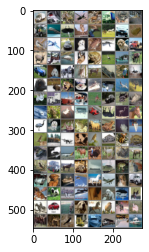

truck car   frog  plane deer  truck frog  cat   car   ship  bird  cat   bird  horse car   frog  bird  plane car   dog   frog  plane dog   truck deer  horse bird  dog   frog  bird  ship  deer  car   dog   horse bird  horse ship  bird  plane bird  deer  frog  dog   ship  truck plane deer  dog   truck ship  truck deer  car   dog   frog  plane frog  cat   ship  car   horse bird  horse bird  dog   deer  frog  horse frog  dog   ship  bird  truck plane cat   bird  truck dog   cat   frog  cat   plane horse bird  deer  frog  deer  bird  truck horse bird  ship  ship  frog  cat   car   dog   ship  bird  horse plane dog   truck dog   dog   horse plane cat   dog   ship  horse horse car   dog   dog   horse bird  cat   dog   deer  frog  bird  truck ship  truck plane ship 


In [337]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    
# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### Back to code : defining the learning rate, optimizer and criterion

In [338]:
# *****START CODE
import torch

lr = 0.01
model = ConvNet(3,10)
validate_network(model, my_architecture_dict)
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum = 0.9)
criterion = nn.CrossEntropyLoss()
epochs = 1
# *****END CODE

In [339]:
# Complete the hyperparams dict with the infos of your run
# *****START CODE
hyperparams = {"Batch size":batch_size,
               "Learning rate":lr,
               "Epochs":epochs}
# *****END CODE

# Init the WandB run with hyperparams
wandb.init(config=hyperparams)

train_acc,▁▅▅▅▅▆▆▇▇█
train_loss,██▇▇▆▆▅▅▅▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▁▃▅▇███
val_loss,█▇▅▄▃▂▂▁▁▁
train_acc,0.12626
train_loss,2.33257
val_acc,0.2191
val_loss,2.44755


### First training loop

In [340]:
# Training on GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)
# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [341]:
# Accuracy = (TP+TN)/(TP+TN+FP+FN) # How the models performs accross all classes
def accuracy(preds, labels):
    return (labels==preds.cpu()).sum()/len(labels) # Argmax of logits is the argmax of the predictions (the softmax of the logits)

# Precision = TP / (TP+FP) # How reliable the model is in classifying samples as Positive
# Think about how the confusion matrix is constructed!
def precision(cm):
    return [col[i]/col.sum() for i, col in enumerate(cm.T)]

# Recall = TP / (TP+FN)
# Think about how the confusion matrix is constructed!
def recall(cm):
    return [row[i]/row.sum() for i, row in enumerate(cm)]

In [342]:
def first_training_loop(model, epochs, train_dataloader, val_dataloader, optimizer, criterion, device):
    total_train_losses = []
    total_val_losses = []

    for epoch in range(1,epochs+1):
        print(f'epoch: {epoch}')
        ##TRAINING##
        model.train()
        train_losses = []
        trn_lbl = torch.Tensor([])
        trn_preds = torch.Tensor([])
        for i, batch, in enumerate(tqdm(train_dataloader)):
            img_batch, lbl_batch = batch
            trn_lbl=torch.cat((trn_lbl, lbl_batch))
            img_batch, lbl_batch = img_batch.to(device), lbl_batch.to(device)

            optimizer.zero_grad()
            logits = model(img_batch)
            trn_preds=torch.cat((trn_preds, logits.argmax(1).cpu()))
            loss=criterion(logits, lbl_batch)
            wandb.log({"train_loss":loss.item()}) # log the training loss at each batch
            loss.backward()
            optimizer.step()

            train_losses.append(loss.item())

        train_acc=accuracy(trn_preds, trn_lbl)
        train_loss_mean = np.mean(train_losses)
        total_train_losses.append(train_loss_mean)


In [343]:
def save_model(model, path):# Saving the model
    torch.save(model.state_dict(), path)

In [344]:
first_training_loop(model, epochs, train_dataloader, val_dataloader, optimizer, criterion, device)
save_model(model, "first_modele-1.pth")

epoch: 1


100%|██████████| 391/391 [00:34<00:00, 11.37it/s]


## 1d) Validate your model

- Show that the model is not overfitting
- How does your model perform ?

In [348]:
from tqdm import tqdm 
from sklearn import metrics

def training_loop(model, epochs, train_dataloader, val_dataloader, optimizer, criterion, train):
    total_train_losses = []
    total_train_acc = []
    total_val_losses = []
    total_val_acc = []

    for epoch in range(1,epochs+1):
        print(f'epoch: {epoch}')
        ##TRAINING##
        model.train()
        train_losses = []
        trn_lbl = torch.Tensor([])
        trn_preds = torch.Tensor([])
        for i, batch, in enumerate(tqdm(train_dataloader)):
            img_batch, lbl_batch = batch
            trn_lbl=torch.cat((trn_lbl, lbl_batch))
            img_batch, lbl_batch = img_batch.to(device), lbl_batch.to(device)

            optimizer.zero_grad()
            logits = model(img_batch)
            trn_preds=torch.cat((trn_preds, logits.argmax(1).cpu()))
            loss=criterion(logits, lbl_batch)
            wandb.log({"train_loss":loss.item()}) # log the training loss at each batch
            loss.backward()
            optimizer.step()

            train_losses.append(loss.item())

        train_acc=accuracy(trn_preds, trn_lbl)
        train_loss_mean = np.mean(train_losses)

        total_train_losses.append(train_loss_mean)
        total_train_acc.append(train_acc)

        ##VALIDATION##
        model.eval()
        val_losses = []
        val_lbl = torch.Tensor([])
        val_preds = torch.Tensor([])
        with torch.no_grad():

            for i, batch, in enumerate(tqdm(val_dataloader)):
                img_batch, lbl_batch = batch
                val_lbl=torch.cat((val_lbl, lbl_batch))
                img_batch, lbl_batch = img_batch.to(device), lbl_batch.to(device)

                logits=model(img_batch)
                val_preds=torch.cat((val_preds, logits.argmax(1).cpu()))
                loss=criterion(logits, lbl_batch)

                val_losses.append(loss.item())

        val_acc=accuracy(val_preds, val_lbl)
        val_loss_mean = np.mean(val_losses)
        wandb.log({"train_acc":train_acc, "val_acc":val_acc, "val_loss":val_loss_mean}) # log the train & val accuracy and the val loss at each epoch
        
        total_val_losses.append(val_loss_mean)
        total_val_acc.append(val_acc)

    cm = confusion_matrix(val_lbl, val_preds)
    disp = ConfusionMatrixDisplay(cm, display_labels=classes)
    disp.plot(xticks_rotation='vertical')
    plt.show()
    print(f'Accuracy: {accuracy(val_lbl, val_preds)}')
    print(f'Precision: {precision(cm)}')
    print(f'Recall: {recall(cm)}')
    print(classification_report(val_lbl, val_preds, target_names=classes))

    
    return total_train_losses, total_train_acc, total_val_acc, total_val_losses

    # save_graph(total_train_losses, total_val_losses, epochs, save_folder)



In [349]:
lr = 0.01
model = ConvNet(3,10)
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum = 0.9)
criterion = nn.CrossEntropyLoss()
epochs = 10

# Training on GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

hyperparams = {"Batch size":batch_size,
               "Learning rate":lr,
               "Epochs":epochs}
# *****END CODE

In [350]:
import matplotlib.pyplot as plt
# plot the graphs 

def plot_results(total_train_losses, total_train_acc, total_val_acc, total_val_losses, epochs) :
  # Accuracy
  fig, ax = plt.subplots()
  ax.plot(range(epochs),total_val_acc )
  ax.plot(range(epochs),total_train_acc )
  plt.title("Accuracy for each epoch for the training and the validation set")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.show()

  # Loss 
  fig, ax = plt.subplots()
  ax.plot(range(epochs),total_val_losses )
  ax.plot(range(epochs),total_train_acc )
  plt.title("Loss for each epoch for the training and the validation set")
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.show()

#plot_results(total_train_losses, total_train_acc, total_val_acc, total_val_losses, epochs)

**How does the model perform ?**

From the graphs we can see that the training has gone well as threw time our each epoch our model is giving better and better performances on the training set. 
We can also see that the model seems to overfit as it has better performances on the train dataset but very poor ones on the validation..

The confusion matrix seems to validate our observations as the F1-score is only 0.62. The accuracy isn't also very good neither are the other Precision and Recall. 

One solution we could have would be to optimize the hyperparameters.

## 1e) Try to optimize hyperparameters, does it improve the performance of your model ?
Anwser with a graph and comment on the result.

Let's try with different learning rates and a slighty modificated optimizer.

##################################################
#################### 	 0.01 	 ####################
##################################################


train_loss,██▇▇▆▅▅▄▅▄▄▃▃▄▃▃▃▃▃▂▁▃▃▄▂▂▂▄▂▂▃▁▁▂▁▂▂▂▁▁
train_loss,1.22409


epoch: 1


100%|██████████| 79/79 [00:05<00:00, 14.93it/s]


epoch: 2


100%|██████████| 79/79 [00:03<00:00, 21.89it/s]


epoch: 3


100%|██████████| 79/79 [00:03<00:00, 20.03it/s]


epoch: 4


100%|██████████| 79/79 [00:03<00:00, 21.36it/s]


epoch: 5


100%|██████████| 79/79 [00:03<00:00, 21.50it/s]


epoch: 6


100%|██████████| 79/79 [00:03<00:00, 22.69it/s]


epoch: 7


100%|██████████| 79/79 [00:03<00:00, 22.27it/s]


epoch: 8


100%|██████████| 79/79 [00:03<00:00, 23.93it/s]


epoch: 9


100%|██████████| 79/79 [00:03<00:00, 23.44it/s]


epoch: 10


100%|██████████| 79/79 [00:03<00:00, 21.77it/s]


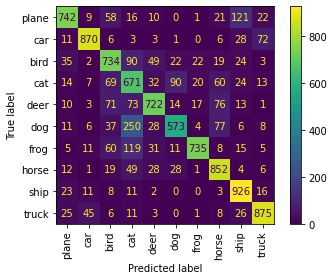

Accuracy: 0.7699999809265137
Precision: [0.8355855855855856, 0.9015544041450777, 0.6872659176029963, 0.5189481825212684, 0.7951541850220264, 0.7753721244925575, 0.9176029962546817, 0.7539823008849558, 0.7801179443976411, 0.8570029382957884]
Recall: [0.742, 0.87, 0.734, 0.671, 0.722, 0.573, 0.735, 0.852, 0.926, 0.875]
              precision    recall  f1-score   support

       plane       0.84      0.74      0.79      1000
         car       0.90      0.87      0.89      1000
        bird       0.69      0.73      0.71      1000
         cat       0.52      0.67      0.59      1000
        deer       0.80      0.72      0.76      1000
         dog       0.78      0.57      0.66      1000
        frog       0.92      0.73      0.82      1000
       horse       0.75      0.85      0.80      1000
        ship       0.78      0.93      0.85      1000
       truck       0.86      0.88      0.87      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.

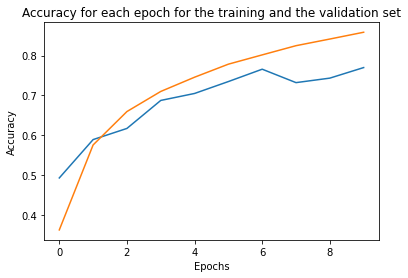

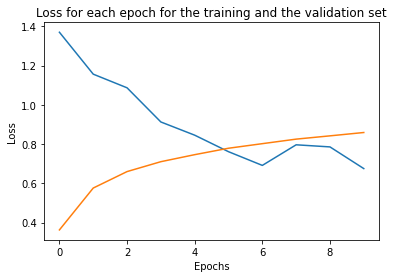

##################################################
#################### 	 0.001 	 ####################
##################################################


train_acc,▁▄▅▆▆▇▇███
train_loss,█▆▆▅▅▄▄▄▄▃▃▄▃▂▃▃▃▃▃▂▂▂▂▃▂▂▂▂▁▂▂▁▂▂▂▂▁▂▂▂
val_acc,▁▃▄▆▆▇█▇▇█
val_loss,█▆▅▃▃▂▁▂▂▁
train_acc,0.85868
train_loss,0.36231
val_acc,0.77
val_loss,0.67488


epoch: 1


100%|██████████| 79/79 [00:04<00:00, 15.80it/s]


epoch: 2


100%|██████████| 79/79 [00:03<00:00, 22.34it/s]


epoch: 3


100%|██████████| 79/79 [00:03<00:00, 21.57it/s]


epoch: 4


100%|██████████| 79/79 [00:04<00:00, 18.95it/s]


epoch: 5


100%|██████████| 79/79 [00:03<00:00, 24.07it/s]


epoch: 6


100%|██████████| 79/79 [00:03<00:00, 22.06it/s]


epoch: 7


100%|██████████| 79/79 [00:03<00:00, 21.55it/s]


epoch: 8


100%|██████████| 79/79 [00:03<00:00, 21.85it/s]


epoch: 9


100%|██████████| 79/79 [00:03<00:00, 23.34it/s]


epoch: 10


100%|██████████| 79/79 [00:03<00:00, 21.52it/s]


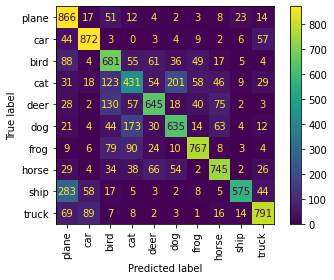

Accuracy: 0.7008000016212463
Precision: [0.5899182561307902, 0.8119180633147114, 0.5825491873396065, 0.49597238204833144, 0.7230941704035875, 0.6580310880829016, 0.8065194532071503, 0.7563451776649747, 0.8942457231726283, 0.8038617886178862]
Recall: [0.866, 0.872, 0.681, 0.431, 0.645, 0.635, 0.767, 0.745, 0.575, 0.791]
              precision    recall  f1-score   support

       plane       0.59      0.87      0.70      1000
         car       0.81      0.87      0.84      1000
        bird       0.58      0.68      0.63      1000
         cat       0.50      0.43      0.46      1000
        deer       0.72      0.65      0.68      1000
         dog       0.66      0.64      0.65      1000
        frog       0.81      0.77      0.79      1000
       horse       0.76      0.74      0.75      1000
        ship       0.89      0.57      0.70      1000
       truck       0.80      0.79      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.71      

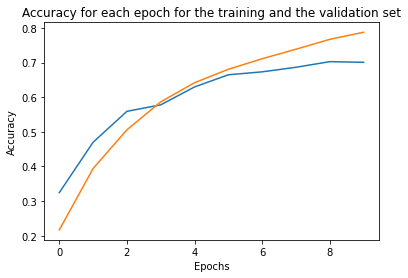

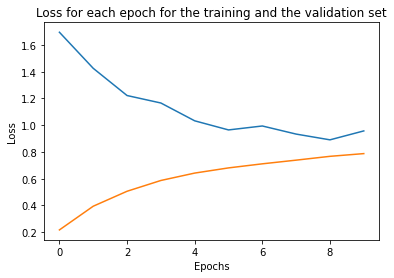

##################################################
#################### 	 0.0001 	 ####################
##################################################


train_acc,▁▃▅▆▆▇▇▇██
train_loss,██▇▆▆▅▅▅▄▄▄▄▃▃▃▃▃▃▃▂▂▃▂▂▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁
val_acc,▁▄▅▆▇▇▇███
val_loss,█▆▄▃▂▂▂▁▁▂
train_acc,0.78766
train_loss,0.57094
val_acc,0.7008
val_loss,0.95742


epoch: 1


100%|██████████| 79/79 [00:05<00:00, 15.75it/s]


epoch: 2


100%|██████████| 79/79 [00:03<00:00, 23.37it/s]


epoch: 3


100%|██████████| 79/79 [00:03<00:00, 22.79it/s]


epoch: 4


100%|██████████| 79/79 [00:03<00:00, 23.75it/s]


epoch: 5


100%|██████████| 79/79 [00:03<00:00, 21.17it/s]


epoch: 6


  6%|▌         | 24/391 [00:01<00:22, 16.30it/s]

In [ ]:
# Train a model from scratch for all these different learning rates

rates = [10**(-2),10**(-3), 10**(-4), 10**(-5)]
best_acc = []

# For each learning rate
for lr in rates : 
    print("#"*50)
    print("#"*20,f"\t {lr} \t","#"*20)
    print("#"*50)

    # Model
    model = ConvNet(3,10)
    criterion = nn.CrossEntropyLoss()
    epochs = 10

    # We add a momentum of 0.9 to help accelerate the gradients vectors in the right direction and thus leading to faster convergence
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum = 0.9)

    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    # Wandb
    hyperparams = {"Batch size":batch_size,
                "Learning rate":lr,
                "Epochs":epochs}

    wandb.init(config=hyperparams)

    # Saving the model and plotting its accuracy and losses.
    total_train_losses, total_train_acc, total_val_acc, total_val_losses = training_loop(model, epochs, train_dataloader, val_dataloader, optimizer, criterion, device)
    save_model(model, f"model-e10-lr{lr}.pth")
    plot_results(total_train_losses, total_train_acc, total_val_acc, total_val_losses, epochs)
    best_acc.append(total_val_acc)

**Modifying the learning rate**


In order to compare these different models, we can examine their accuracy, F1score, and graphs. The model that performs the best in terms of accuracy is the one with a learning rate of $10^{-2}$. Its corresponding accuracy and mean are 0.74, and the graph indicates that there is no overfitting.

The remaining models all perform worse, starting with the model with a learning rate of $10^{-3}$ and an accuracy of 0.73. The next model, with a learning rate of $10^{-4}$, has an accuracy of only 0.56. Finally, the last model has an accuracy of 0.24. We can conclude that as the learning rate decreases, the model loses its ability to learn quickly.

## 1f) Get an intermediate layer from your convolutional neural network and visualize what patterns the network has learned
*   Complete the following code that visualizes the patterns of the network
*   Write a small description commenting on the visualized maps. What do you observe in the different visualizations of the feature maps?

In [ ]:
# The intermediate layer you should visualize:
# print('My intermediate layer to visualize is: %s'%(my_architecture_dict['visualize']))

`my_architecture_dict['visualize']` doesn't seem to work. For the next parts we will use the second `conv2D` layer.



Filter 0. Epoch 30. Loss = 0.1869
Filter 1. Epoch 30. Loss = -0.8839
Filter 2. Epoch 30. Loss = -7.9575
Filter 3. Epoch 30. Loss = -22372013779009404928.0000
Filter 4. Epoch 30. Loss = nan
Filter 5. Epoch 30. Loss = nan
Filter 6. Epoch 30. Loss = nan
Filter 7. Epoch 30. Loss = nan
Filter 8. Epoch 30. Loss = nan
Filter 9. Epoch 30. Loss = nan
Filter 10. Epoch 30. Loss = nan
Filter 11. Epoch 30. Loss = nan
Filter 12. Epoch 30. Loss = nan
Filter 13. Epoch 30. Loss = nan
Filter 14. Epoch 30. Loss = nan
Filter 15. Epoch 30. Loss = nan
Filter 16. Epoch 30. Loss = nan
Filter 17. Epoch 30. Loss = nan
Filter 18. Epoch 30. Loss = nan
Filter 19. Epoch 30. Loss = nan
Filter 20. Epoch 30. Loss = nan
Filter 21. Epoch 30. Loss = nan
Filter 22. Epoch 30. Loss = nan
Filter 23. Epoch 30. Loss = nan
Filter 24. Epoch 30. Loss = nan
Filter 25. Epoch 30. Loss = nan
Filter 26. Epoch 30. Loss = nan
Filter 27. Epoch 30. Loss = nan
Filter 28. Epoch 30. Loss = nan
Filter 29. Epoch 30. Loss = nan
Filter 30. Epoch

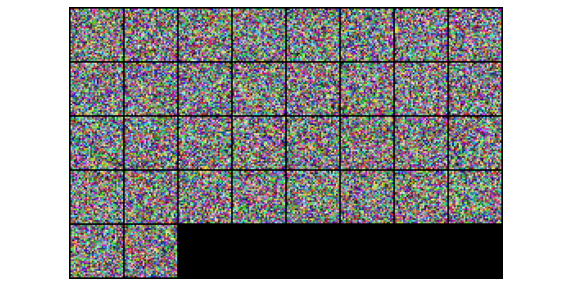

In [22]:
import sys
from skimage import io
import torchvision.utils as vutils

##function for printing the loss during optimization
def write_flush(text, stream=sys.stdout):
    stream.write(text)
    stream.flush()
    return

## Number of feature maps in the intermediate layer that you have chosen. 
# *****START CODE
n_conv = 34  # e.g 64
# *****END CODE

## Size of visualised filter.
img_size = 32

##load your optimal model
# *****START CODE
model = ConvNet(3,10)
model.load_state_dict(torch.load('/kaggle/input/models/model-e10-lr0.01(1).pth')) 
# *****END CODE

## Create a submodel, until the intermediate layer of your choice.
## Hint: Use model.#name# to create the succession of layers, where #name#
## stands for the layer names that you defined in the initialization function 
## of your model.
# *****START CODE
submodel = nn.Sequential(
  model.conv1,
  model.batch1,
  model.relu1,
  model.maxpool1,
  model.conv2
    
)
# *****END CODE


## Put submodel in eval mode.
submodel.eval()

## Tensor to visualised filters. 
img_stack = torch.zeros((n_conv, 3, img_size, img_size))

## Number of epochs to run for every filter. 
# *****START CODE
n_epochs_per_filt = 30  #e.g 30
# *****END CODE

## Visualise every convolution. 
for c in range(n_conv):
    ## Initialise with random image. 
    img = torch.rand(1, 3, img_size, img_size).float()

    ## Turn on gradient calculation on the image
    # *****START CODE
    img.requires_grad = True
    # *****END CODE

    ## Define optimizer.
    # *****START CODE
    optimizer=torch.optim.SGD(submodel.parameters(), lr=0.01)
    # *****END CODE
    
    for f in range(n_epochs_per_filt):
        optimizer.zero_grad()
        
        ## Feedforward propagation
        ## Hint: In order to find the loss, compupte the negative of the activation of the hidden layer. 
        ## The objective is to produce an input image which maximizes the activation 
        ## of neurons in a particular hidden layer. 
        # *****START CODE
        logits = submodel(img)
        
        loss = -1 * logits[0].mean()


        loss.backward()
        optimizer.step()
        
        # *****END CODE
        write_flush('\rFilter %d. Epoch %d. Loss = %.4f'%(c, f+1, loss.item()))

    write_flush('\n')
    img_stack[c, :, :, :] = img[0].detach()

## Make grid out of visualized filters. 
##Here you may have to adjust the properties of vutils.make_grid, depending on your needs. 
##For example, you may need to change the number of rows.
G = vutils.make_grid(img_stack, nrow=8, normalize=True, padding=1).permute(1,2,0).numpy()
plt.figure(figsize=(10,5))
plt.imshow(G)
plt.axis('equal')
plt.axis('off')
plt.show()

Here is another attempt where we try to iterate threw each layer and pass the logits threw each conv2d.

This code is not complete..

Filter 0. Epoch 10. Loss = -0.0130




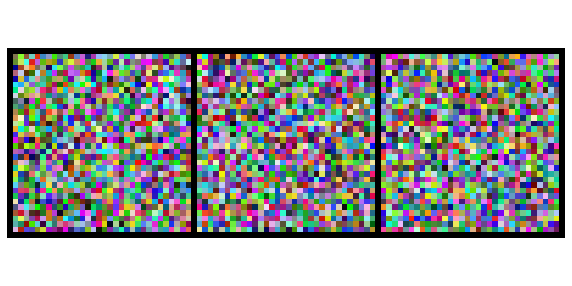

In [25]:
import sys
from skimage import io
import torchvision.utils as vutils

##function for printing the loss during optimization
def write_flush(text, stream=sys.stdout):
    stream.write(text)
    stream.flush()
    return

## Number of feature maps in the intermediate layer that you have chosen. 
# *****START CODE
n_conv = 3 # e.g 64
# *****END CODE

## Size of visualised filter.
img_size = 32

##load your optimal model
# *****START CODE
model = ConvNet(3,10)
model.load_state_dict(torch.load('/kaggle/input/models/model-e10-lr0.01(1).pth')) 
# *****END CODE

## Create a submodel, until the intermediate layer of your choice.
## Hint: Use model.#name# to create the succession of layers, where #name#
## stands for the layer names that you defined in the initialization function 
## of your model.
# *****START CODE
submodel = nn.Sequential(
    model.conv1,
    model.batch1,
    model.relu1,
    model.maxpool1,

        
)
# *****END CODE


## Put submodel in eval mode.
submodel.eval()

## Tensor to visualised filters. 
img_stack = torch.zeros((n_conv, 3, img_size, img_size))

## Number of epochs to run for every filter. 
# *****START CODE
n_epochs_per_filt = 10  #e.g 30
# *****END CODE

## Visualise every convolution. 
for c in range(n_conv):
    ## Initialise with random image. 
    img = torch.rand(1, 3, img_size, img_size).float()

    ## Turn on gradient calculation on the image
    # *****START CODE
    img.requires_grad = True
    # *****END CODE

    ## Define optimizer.
    # *****START CODE
    optimizer=torch.optim.SGD(submodel.parameters(), lr=0.01)
    # *****END CODE
    
    for f in range(n_epochs_per_filt):
        optimizer.zero_grad()
        
        ## Feedforward propagation
        ## Hint: In order to find the loss, compupte the negative of the activation of the hidden layer. 
        ## The objective is to produce an input image which maximizes the activation 
        ## of neurons in a particular hidden layer. 
        # *****START CODE
        logits = submodel(img)
        
        # For each conv2d we apply the loss. To complete the code we would need to change the input from 'image'
        # to the value of a tensor
        if type(list(submodel.named_children())[c][1]) == torch.nn.modules.conv.Conv2d:
            loss =  list(submodel.named_children())[c][1](img).mean()
            loss.backward()
            optimizer.step()
            write_flush('\rFilter %d. Epoch %d. Loss = %.4f'%(c, f+1, loss.item()))

        else: 
            pass
        # *****END CODE


    write_flush('\n')
    img_stack[c, :, :, :] = img[0].detach()

## Make grid out of visualized filters. 
##Here you may have to adjust the properties of vutils.make_grid, depending on your needs. 
##For example, you may need to change the number of rows.
G = vutils.make_grid(img_stack, nrow=8, normalize=True, padding=1).permute(1,2,0).numpy()
plt.figure(figsize=(10,5))
plt.imshow(G)
plt.axis('equal')
plt.axis('off')
plt.show()

## 1g) Use GradCAM algorithm to visualize the saliency maps of your trained model at the same intermediate layer
*   Install pytorch grad cam package if needed (https://github.com/jacobgil/pytorch-grad-cam)
*   Complete the following code that visualizes GradCAM heatmaps on an input image from your model
*   Try on several input images / classes. 
*   Write a small description commenting on the visualized heatmaps. 

In [26]:
# Install pytorch grad cam package
! pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 15.8 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38242 sha256=9c34cc90ee917216392c8b05568af46fe1acf5d98dd05892ba15453545a4d5bf
  Stored in directory: /root/.cache/pip/wheels/a4/6a/11/fa213a7aaae1a99a800b86bdd1cc95bc9c7d7914b0859663b8
Successfully built grad-cam


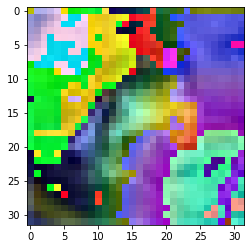

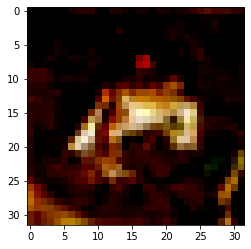

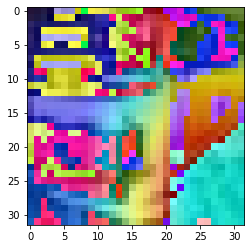

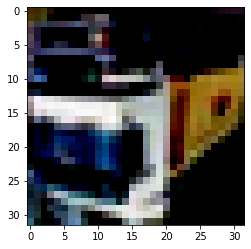

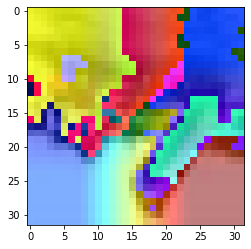

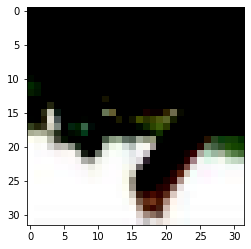

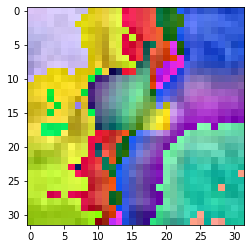

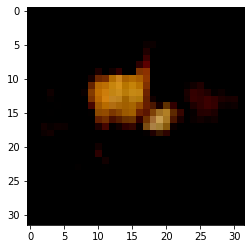

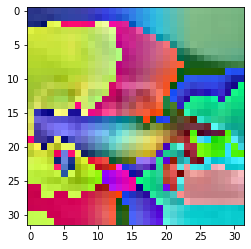

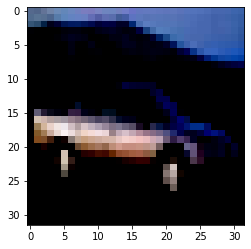

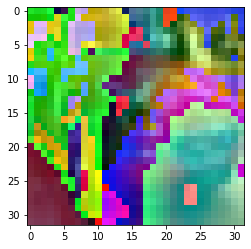

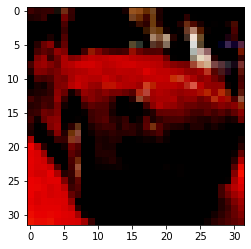

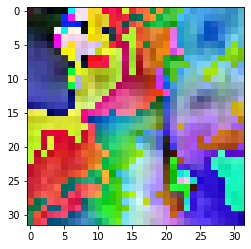

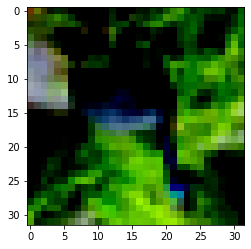

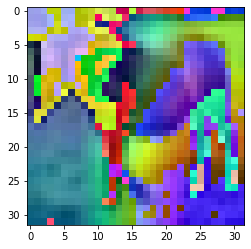

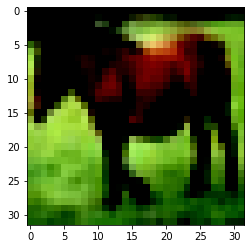

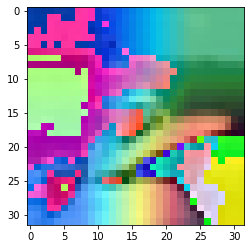

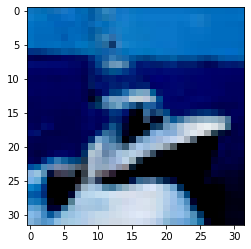

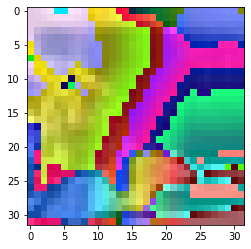

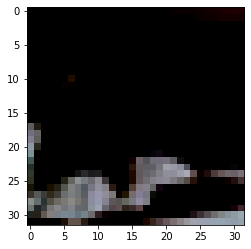

In [27]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
use_cuda = True

# *****START CODE
model = ConvNet(3,10)
model.load_state_dict(torch.load('/kaggle/input/models/model-e10-lr0.01(1).pth'))

# Get your intermediate layer
target_layers = [model.conv8]

for test_images, test_labels in val_dataloader:  
    sample_image = test_images

input_tensor = sample_image # Create an input tensor from your image for your model..
# Note: input_tensor can be a batch tensor with several images!
target_category = None


# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=False)


# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor)

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]

for x in range(10):
    rgb_img = np.array(trainset[x][0])
    rgb_img = np.moveaxis(rgb_img,0,-1)

    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

    # Plot figure
    plt.figure()
    plt.imshow(visualization)
    plt.show()
    plt.figure()
    plt.imshow(rgb_img)
    plt.show()

Here the code we did applies a heatmap directly to the rbg_image. This way the part of the image that is recognized is colored in a more bright color. We can understand thanks to this that for example the horse is mainly recognized thanks to his head and body. 

### Question 2 - Train on geometrical shapes

Function 'generate_a_triangle' produces images depicting random triangles along with the (x,y) coordinates of the vertices. Create a convolutional neural network that receives as input the triangle image and predicts the corresponding (x,y) coordinates of the triangle's vertices. 
*  Read and understand the following code

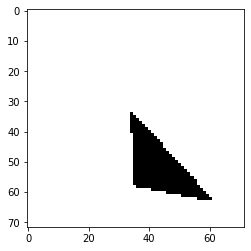

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_triangle():
    figsize = 1.0
    U = np.random.random(3)
    V = np.random.random(3)
    imdata = generate_a_drawing(figsize, U, V)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

[im, v] = generate_a_triangle()
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

def generate_dataset_regression(nb_samples):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            #print(i)
            pass
        [X[i], Y[i]] = generate_a_triangle()
    X = X / 255
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300)
    return [X_test, Y_test]

2a) Use function 'generate_dataset_regression' to create the dataset. Split the dataset to training and validation parts.

In [251]:
import torch 

##generate dataset
# *****START CODE
samples= 500
dataset = generate_dataset_regression(samples)
# *****END CODE

Creating data:


**Exploring and modifying the data**

In [252]:
print("Dataset shapes")
print(dataset[0].shape)
print(dataset[1].shape)

x_dataset = dataset[0]
y_dataset = dataset[1]

print("Lets transform the imdata to a 72.72 shape")
print(x_dataset[1].shape)

x_dataset = x_dataset.reshape(500,72,72)
print("x shape = ", x_dataset.shape)

dataset[0] = dataset[0].reshape(500,72,72)

Dataset shapes
(500, 5184)
(500, 6)
Lets transform the imdata to a 72.72 shape
(5184,)
x shape =  (500, 72, 72)


In [253]:
dataset_tensor = torch.utils.data.TensorDataset(torch.tensor(dataset[0]).float(),torch.tensor(dataset[1]).float())

In [254]:
##split the dataset to training and validation parts
# *****START CODE
train_size = int(0.7 * len(dataset[0]))
val_size = len(dataset[0]) - train_size
trainset, valset = torch.utils.data.random_split(dataset_tensor, [train_size, val_size])


train_dataloader = torch.utils.data.DataLoader(trainset, batch_size = 64,shuffle = True )
val_dataloader = torch.utils.data.DataLoader(valset, batch_size = 64,shuffle = False )
# *****END CODE

In [255]:
for a, b in train_dataloader:
    print(a.shape)
    print(b.shape)

torch.Size([64, 72, 72])
torch.Size([64, 6])
torch.Size([64, 72, 72])
torch.Size([64, 6])
torch.Size([64, 72, 72])
torch.Size([64, 6])
torch.Size([64, 72, 72])
torch.Size([64, 6])
torch.Size([64, 72, 72])
torch.Size([64, 6])
torch.Size([30, 72, 72])
torch.Size([30, 6])


2b) Use function 'generate_test_set' to create the testing dataset.

In [256]:
##generate test dataset
# *****START CODE
samples= 500
testset = generate_dataset_regression(samples)
testset[0] = testset[0].reshape(500,72,72)
testset_tensor = torch.utils.data.TensorDataset(torch.tensor(testset[0]).float(),torch.tensor(testset[1]).float())
test_dataloader = torch.utils.data.DataLoader(testset_tensor, batch_size = 64,shuffle = False )
# *****END CODE

Creating data:


2c) Create your own convolutional neural network.
* Begin with the previous exercise model architecture
* Optimize the architecture to perform well on predicting the different coordinates

In [258]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# *****START CODE
class ConvNetR(nn.Module):
    def __init__(self, input, output):
        
        super(ConvNetR, self).__init__()


        self.conv1  = nn.Conv2d(input,56,3,padding  = 1)
        self.batch1 =nn.BatchNorm2d(56)

        self.relu1  = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(2,2)

        self.conv2  = nn.Conv2d(56,135,3,padding  = 1)
        self.batch2 =nn.BatchNorm2d(135)

        self.relu2  = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(2,2)
        
        self.conv3  = nn.Conv2d(135,246,3,padding  = 1)
        self.batch3 =nn.BatchNorm2d(246)
        
        self.relu3  = nn.ReLU()
        self.conv4  = nn.Conv2d(246,246,3,padding  = 1)
        
        self.batch4 =nn.BatchNorm2d(246)
        self.relu4  = nn.ReLU()
        #10 
        
        self.maxpool3 = nn.MaxPool2d(2,2)
        self.conv5  = nn.Conv2d(246,520,3,padding  = 1)
        
        self.batch5 =nn.BatchNorm2d(520)
        self.relu5  = nn.ReLU()
        
        self.conv6  = nn.Conv2d(520,520,3,padding  = 1)
        self.batch6 =nn.BatchNorm2d(520)

        self.relu6  = nn.ReLU()
        self.maxpool4 = nn.MaxPool2d(2,2)
        
        self.conv7  = nn.Conv2d(520,520,3,padding  = 1)
        self.batch7 = nn.BatchNorm2d(520)
        
        self.relu7  = nn.ReLU()
        self.conv8  = nn.Conv2d(520,520,3,padding  = 1)
        
        self.batch8 = nn.BatchNorm2d(520)
        self.relu8  = nn.ReLU()
        
        self.maxpool5 = nn.MaxPool2d(2,2)
        # Compute here set to 520 to fit the previous modules. 
        self.adapt1 = nn.AdaptiveAvgPool2d(1)
        
        # Does not modify the size 
        self.dropout1 = nn.Dropout(p=0.5112472379693787)
        # We still are only with 520
        self.linear1 = nn.Linear(520, 2142)
        
        self.relu9 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=0.5112472379693787)
        
        self.linear2 = nn.Linear(2142,3067)
        self.relu10 = nn.ReLU()

        self.dropout3 = nn.Dropout(p=0.5112472379693787)
        self.linear3 = nn.Linear(3067,3922)
        
        self.relu11 = nn.ReLU()
        
        self.linear4 = nn.Linear(3922,output)

        
    def forward(self, x):
        x = self.conv1(x)
        x = self.batch1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.batch2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.batch3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.batch4(x)
        x = self.relu4(x)
        x = self.maxpool3(x)
        x = self.conv5(x)
        x = self.batch5(x)
        x = self.relu5(x)
        x = self.conv6(x)
        x = self.batch6(x)
        x = self.relu6(x)
        
        x = self.maxpool4(x)
        x = self.conv7(x)

        x = self.batch7(x)
        x = self.relu7(x)
        
        x = self.conv8(x)
        x = self.batch8(x)
        x = self.relu8(x)
        x = self.maxpool5(x)
        x = self.adapt1(x)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.linear1(x)
        x = self.relu9(x)

        x = self.dropout2(x)
        x = self.linear2(x)
        
        x = self.relu10(x)
        x = self.dropout3(x)

        x = self.linear3(x)
        x = self.relu11(x)

        x = self.linear4(x)
        return x
# *****END CODE

2d) Define learning rate, model, optimizer, criterion and number of epochs.

In [305]:
# *****START CODE
lr = 0.1
model = ConvNetR(1,6)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum = 0.9)

epochs = 10

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)
# *****END CODE

ConvNetR(
  (conv1): Conv2d(1, 56, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch1): BatchNorm2d(56, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(56, 135, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch2): BatchNorm2d(135, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(135, 246, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch3): BatchNorm2d(246, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (conv4): Conv2d(246, 246, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch4): BatchNorm2d(246, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu4): ReLU()
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=

2e) What criterion did you choose and why?
* Write a small description for the loss function that you want to use for this specific problem.
* What was your intuition for using this loss?

In this exercise we are making predictions on a regression problem, therefore the CrossEntropy which is good for classification isn't the right criterion. The one we will use is suited for regression, it is the MSELoss(). It measures the average squared difference between the predicted values and the ground truth values. The MSE loss is defined as:

L = 1/n * ∑(y_pred - y)^2

where n is the number of samples, y_pred is the predicted value for each sample, and y is the ground truth value for each sample. The MSE loss is typically used in conjunction with a regression model, such as a linear regression or a neural network, to optimize the model's parameters and minimize the difference between the predicted values and the ground truth values.

2f) Train your model and validate it at the end of each epoch.
* Similarly to the previous question train and validate your network for each epoch
* Write a small description on how you decide which is the optimal epoch
* Use this epoch and evaluate your model on the test set
* Visualise some predictions using the function 'visualize_prediction'
* What do you observe?

In [306]:
from tqdm import tqdm 
from sklearn import metrics

def training_loop(model, epochs, train_dataloader, val_dataloader, optimizer, criterion, train):
    total_train_losses = []
    total_val_losses = []

    for epoch in range(1,epochs+1):
        print(f'epoch: {epoch}')
        ##TRAINING##
        model.train()
        
        train_loss = []
        for i, batch, in enumerate(tqdm(train_dataloader)):
            x,y = batch
            x, y = x.to(device), y.to(device)
            x = x.unsqueeze(1)
            optimizer.zero_grad()
            logits = model(x)

            loss=criterion(logits, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            
        train_loss_mean = np.mean(train_loss)
        total_train_losses.append(train_loss_mean)

        ##VALIDATION##
        model.eval()
        val_losses = []
        with torch.no_grad():
            for i, batch, in enumerate(tqdm(val_dataloader)):
                x, y = batch
                x, y = x.to(device), y.to(device)
                x = x.unsqueeze(1)
                logits=model(x)
                loss=criterion(logits, y)
                val_losses.append(loss.item())
        val_loss_mean = np.mean(val_losses)
        total_val_losses.append(val_loss_mean)

    print("train loss = ", np.mean(total_val_losses))
    print("val loss = ", np.mean(total_train_losses))
    
    return total_val_losses, total_train_losses

epoch: 1


100%|██████████| 3/3 [00:00<00:00, 81.39it/s]


epoch: 2


100%|██████████| 3/3 [00:00<00:00, 80.23it/s]


epoch: 3


100%|██████████| 3/3 [00:00<00:00, 81.84it/s]


epoch: 4


100%|██████████| 3/3 [00:00<00:00, 80.64it/s]


epoch: 5


100%|██████████| 3/3 [00:00<00:00, 81.18it/s]


epoch: 6


100%|██████████| 3/3 [00:00<00:00, 80.31it/s]


epoch: 7


100%|██████████| 3/3 [00:00<00:00, 80.80it/s]


epoch: 8


100%|██████████| 3/3 [00:00<00:00, 81.54it/s]


epoch: 9


100%|██████████| 3/3 [00:00<00:00, 81.77it/s]


epoch: 10


100%|██████████| 3/3 [00:00<00:00, 80.59it/s]


train loss =  0.10152942513426144
val loss =  0.13569864792128403


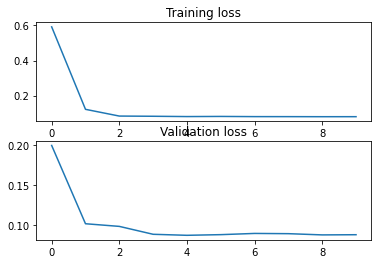

In [308]:
# *****START CODE

lr = 0.1
model = ConvNetR(1,6)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum = 0.9)
epochs = 10
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

total_val_losses, total_train_losses = training_loop(model,epochs,train_dataloader,val_dataloader, optimizer,criterion, device)

fig, ax = plt.subplots(2,1)
ax[0].plot(range(epochs), total_train_losses)
ax[0].set_title('Training loss')
ax[1].plot(range(epochs), total_val_losses)
ax[1].set_title('Validation loss')
plt.show()

After many tries we decided to stay to a 10 epochs. With more the model was clearly overfitting as we can see in the example below. 

epoch: 1


100%|██████████| 3/3 [00:00<00:00, 78.59it/s]


epoch: 2


100%|██████████| 3/3 [00:00<00:00, 79.88it/s]


epoch: 3


100%|██████████| 3/3 [00:00<00:00, 79.98it/s]


epoch: 4


100%|██████████| 3/3 [00:00<00:00, 81.02it/s]


epoch: 5


100%|██████████| 3/3 [00:00<00:00, 79.70it/s]


epoch: 6


100%|██████████| 3/3 [00:00<00:00, 80.42it/s]


epoch: 7


100%|██████████| 3/3 [00:00<00:00, 79.98it/s]


epoch: 8


100%|██████████| 3/3 [00:00<00:00, 80.66it/s]


epoch: 9


100%|██████████| 3/3 [00:00<00:00, 79.47it/s]


epoch: 10


100%|██████████| 3/3 [00:00<00:00, 74.91it/s]


epoch: 11


100%|██████████| 3/3 [00:00<00:00, 80.86it/s]


epoch: 12


100%|██████████| 3/3 [00:00<00:00, 78.42it/s]


epoch: 13


100%|██████████| 3/3 [00:00<00:00, 67.30it/s]


epoch: 14


100%|██████████| 3/3 [00:00<00:00, 80.00it/s]


epoch: 15


100%|██████████| 3/3 [00:00<00:00, 79.95it/s]


epoch: 16


100%|██████████| 3/3 [00:00<00:00, 80.70it/s]


epoch: 17


100%|██████████| 3/3 [00:00<00:00, 82.01it/s]


epoch: 18


100%|██████████| 3/3 [00:00<00:00, 81.72it/s]


epoch: 19


100%|██████████| 3/3 [00:00<00:00, 82.05it/s]


epoch: 20


100%|██████████| 3/3 [00:00<00:00, 79.79it/s]


epoch: 21


100%|██████████| 3/3 [00:00<00:00, 81.09it/s]


epoch: 22


100%|██████████| 3/3 [00:00<00:00, 79.77it/s]


epoch: 23


100%|██████████| 3/3 [00:00<00:00, 80.85it/s]


epoch: 24


100%|██████████| 3/3 [00:00<00:00, 80.14it/s]


epoch: 25


100%|██████████| 3/3 [00:00<00:00, 80.73it/s]


epoch: 26


100%|██████████| 3/3 [00:00<00:00, 81.94it/s]


epoch: 27


100%|██████████| 3/3 [00:00<00:00, 80.96it/s]


epoch: 28


100%|██████████| 3/3 [00:00<00:00, 80.78it/s]


epoch: 29


100%|██████████| 3/3 [00:00<00:00, 82.09it/s]


epoch: 30


100%|██████████| 3/3 [00:00<00:00, 81.19it/s]


epoch: 31


100%|██████████| 3/3 [00:00<00:00, 80.82it/s]


epoch: 32


100%|██████████| 3/3 [00:00<00:00, 80.94it/s]


epoch: 33


100%|██████████| 3/3 [00:00<00:00, 80.56it/s]


epoch: 34


100%|██████████| 3/3 [00:00<00:00, 81.75it/s]


epoch: 35


100%|██████████| 3/3 [00:00<00:00, 81.53it/s]


epoch: 36


100%|██████████| 3/3 [00:00<00:00, 81.70it/s]


epoch: 37


100%|██████████| 3/3 [00:00<00:00, 80.36it/s]


epoch: 38


100%|██████████| 3/3 [00:00<00:00, 81.93it/s]


epoch: 39


100%|██████████| 3/3 [00:00<00:00, 81.80it/s]


epoch: 40


100%|██████████| 3/3 [00:00<00:00, 81.67it/s]


epoch: 41


100%|██████████| 3/3 [00:00<00:00, 81.06it/s]


epoch: 42


100%|██████████| 3/3 [00:00<00:00, 79.96it/s]


epoch: 43


100%|██████████| 3/3 [00:00<00:00, 77.69it/s]


epoch: 44


100%|██████████| 3/3 [00:00<00:00, 79.72it/s]


epoch: 45


100%|██████████| 3/3 [00:00<00:00, 80.29it/s]


epoch: 46


100%|██████████| 3/3 [00:00<00:00, 80.64it/s]


epoch: 47


100%|██████████| 3/3 [00:00<00:00, 80.19it/s]


epoch: 48


100%|██████████| 3/3 [00:00<00:00, 81.78it/s]


epoch: 49


100%|██████████| 3/3 [00:00<00:00, 81.87it/s]


epoch: 50


100%|██████████| 3/3 [00:00<00:00, 80.70it/s]


train loss =  0.09195680121580761
val loss =  0.07915224272757769


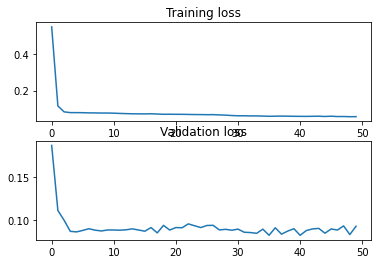

In [321]:
# *****START CODE

lr = 0.1
model_overfitting = ConvNetR(1,6)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model_overfitting.parameters(), lr=lr, momentum = 0.9)
epochs = 50
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_overfitting.to(device)

total_val_losses, total_train_losses = training_loop(model_overfitting,epochs,train_dataloader,val_dataloader, optimizer,criterion, device)

fig, ax = plt.subplots(2,1)
ax[0].plot(range(epochs), total_train_losses)
ax[0].set_title('Training loss')
ax[1].plot(range(epochs), total_val_losses)
ax[1].set_title('Validation loss')
plt.show()

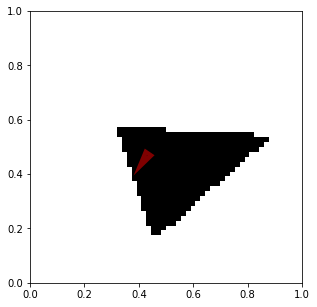

In [324]:
import random 

x, y = next(iter(test_dataloader))
model = model.cpu()
x = x.unsqueeze(1)
pred = model(x)
pred  = pred.detach().numpy()
x = x.detach().numpy()
ran_id = random.randint(0, 64)
visualize_prediction(x[ran_id],pred[ran_id])

# Question 3
Answer these generic questions:

3a) What is a metric? What is a loss? What is the difference between both?

Your answer:

In deep learning, a metric is a function that is used to evaluate the performance of a model on a given dataset. It is used to measure how well the model is able to predict the desired output for a given input. A common example of a metric is accuracy, which is the percentage of predictions made by the model that are correct.

A loss is a function that is used to measure the error between the predicted output of a model and the true output. The goal of training a deep learning model is to minimize the loss, so that the model can make accurate predictions on unseen data.

The difference between a metric and a loss is that a metric is used to evaluate the performance of the model, while a loss is used to optimize the model during training. The loss is used to adjust the model's internal parameters in order to minimize the error between the predicted output and the true output. The metric is used to evaluate the model's performance after it has been trained and is used to compare the performance of different models.

3b) Why deep learning models are difficult to understand even on a particular prediction?

Your answer:

There are several reasons why deep learning models can be difficult to understand, even on a particular prediction:

1.     Complexity: Deep learning models can be very complex, with many layers and a large number of parameters. This complexity can make it difficult to understand how the model is making its predictions.

2.     Black-box nature: Deep learning models are often referred to as "black-box" models because they are difficult to interpret. It can be difficult to understand how the model is using the input features to make its predictions, and it is often not possible to explain the reasoning behind a particular prediction.

3.    Lack of transparency: Many deep learning models do not provide transparency into their internal workings, which can make it difficult to understand how they are making predictions.

4.    Lack of context: A deep learning model may make a prediction based on patterns and relationships in the data that are not immediately apparent to a human. Without an understanding of the context in which the prediction is being made, it can be difficult to understand the reasoning behind the prediction.

5.    Overfitting: If a deep learning model is overfitted to the training data, it may make predictions that are based on noise or random patterns in the data rather than meaningful relationships. This can make the model's predictions difficult to understand.

3c) What is "out of domain data"?

Your answer:

In deep learning, out-of-domain data refers to data that is not part of the distribution of data that the model was trained on. For example, if a model was trained on images of dogs, out-of-domain data for that model would be images of cats, or images of landscapes.

Out-of-domain data can be difficult for deep learning models to handle because they have not seen this type of data during training, and may not have learned to recognize the patterns and features that are relevant to these types of data. As a result, the model may not be able to make accurate predictions on out-of-domain data.

It is important to consider the possibility of out-of-domain data when training and evaluating a deep learning model, as the model may perform poorly on this type of data. This can be addressed by using a diverse training set that includes examples from a wide range of possible inputs, or by using domain adaptation techniques to adjust the model to work with out-of-domain data.


3d) Name five tasks where Deep Learning models are the state-of-the-art:
For example: Folding proteins in Biology

Your answer:

1.    Image classification: Deep learning models are state-of-the-art for tasks such as object recognition in images and classification of images into different categories.

2.    Natural language processing: Deep learning models are widely used for tasks such as machine translation, language modeling, and text classification.

3.    Speech recognition: Deep learning models are the state-of-the-art for tasks such as speech-to-text transcription and speaker identification.

4.    Recommendation systems: Deep learning models are used to build recommendation systems that can personalize recommendations for users based on their past behavior and preferences.

5.    Generative models: Deep learning models are also used to generate new content, such as images, text, and audio, using generative adversarial networks (GANs) and other techniques.

3e)What is an “activation function” and what is it used for in Deep Learning models?

Your answer:

An activation function is a mathematical function that is applied to the output of a neuron in a neural network. It determines the output of the neuron given an input or set of inputs. Activation functions are used in deep learning models to introduce non-linearity into the model, allowing the model to learn more complex relationships in the data.

There are several types of activation functions that can be used in deep learning models, including sigmoid, tanh, ReLU (rectified linear unit), and leaky ReLU. The choice of activation function can affect the performance of the model and the speed of training.

The main purpose of an activation function is to introduce non-linearity into the model. Without non-linearity, a neural network would be equivalent to a linear model, which is not powerful enough to model many real-world relationships. Activation functions allow the model to learn more complex patterns and relationships in the data, improving the model's ability to make accurate predictions.